In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import funciones as fs
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as st


%matplotlib inline

In [2]:
df_finaldemo = pd.read_csv("df_final_demo.csv")
df_finaldemo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [3]:
df_pt1 = pd.read_csv("df_final_web_data_pt_1.csv")
df_pt1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [4]:
df_pt2 = pd.read_csv("df_final_web_data_pt_2.csv")
df_pt2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [5]:
df_webdata = pd.concat([df_pt1, df_pt2], axis=0, ignore_index = True)
df_webdata

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [6]:
df_experiment = pd.read_csv("df_final_experiment_clients.csv")
df_experiment

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [7]:
df_experiment['client_id'].nunique()

70609

In [8]:
df_finaldemo = pd.read_csv('finaldemo.csv')

df_webdata = pd.read_csv('finalweb.csv')

In [9]:
df_perfil_exp = pd.merge(df_finaldemo, df_experiment, on='client_id', how='inner')
df_perfil_exp.head()

,client_id,tenure_year,tenure_month,age,gender,num_accounts,bal,calls_6_mnth,logons_6_mnth,age_category,tenure_category,Variation
0,836976,6.0,73.0,60.0,U,2.0,45105.30,6.0,9.0,Adult,Intermediate,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Adult,Intermediate,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Young Adult,New,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Adult,Long Term,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Young Adult,Long Term,Control


In [10]:
df_master_0 = pd.merge(df_webdata, df_perfil_exp, on='client_id', how='inner')
df_master_0.head()

,client_id,visitor_id,visit_id,process_step,date_time,next_time,duracion,step_number,paso_sig,check_error,...,tenure_month,age,gender,num_accounts,bal,calls_6_mnth,logons_6_mnth,age_category,tenure_category,Variation
0,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,2017-04-12 20:19:45,9.0,0,1.0,False,...,262.0,48.0,M,2.0,501570.72,4.0,4.0,Adult,Veteran,NaN
1,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,2017-04-12 20:20:31,46.0,1,2.0,False,...,262.0,48.0,M,2.0,501570.72,4.0,4.0,Adult,Veteran,NaN
2,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,2017-04-12 20:22:05,94.0,2,3.0,False,...,262.0,48.0,M,2.0,501570.72,4.0,4.0,Adult,Veteran,NaN
3,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,2017-04-12 20:23:09,64.0,3,NaN,False,...,262.0,48.0,M,2.0,501570.72,4.0,4.0,Adult,Veteran,NaN
4,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,2017-04-15 12:58:03,7.0,0,1.0,False,...,46.0,30.0,U,2.0,25454.66,2.0,6.0,Young Adult,New,Test


In [11]:
df_master_0.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time',
       'next_time', 'duracion', 'step_number', 'paso_sig', 'check_error',
       'tenure_year', 'tenure_month', 'age', 'gender', 'num_accounts', 'bal',
       'calls_6_mnth', 'logons_6_mnth', 'age_category', 'tenure_category',
       'Variation'],
      dtype='object')

In [12]:
df_master_0 = df_master_0.rename(columns={'Variation': 'variation'})
columnas_mantener = ['client_id', 'variation', 'bal', 'age_category', 'tenure_category', 'process_step', 'paso_sig', 'step_number', 'check_error', 'date_time', 'next_time', 'duracion']

df_master = df_master_0[columnas_mantener].copy()
df_master

,client_id,variation,bal,age_category,tenure_category,process_step,paso_sig,step_number,check_error,date_time,next_time,duracion
0,169,NaN,501570.72,Adult,Veteran,start,1.0,0,False,2017-04-12 20:19:36,2017-04-12 20:19:45,9.0
1,169,NaN,501570.72,Adult,Veteran,step_1,2.0,1,False,2017-04-12 20:19:45,2017-04-12 20:20:31,46.0
2,169,NaN,501570.72,Adult,Veteran,step_2,3.0,2,False,2017-04-12 20:20:31,2017-04-12 20:22:05,94.0
3,169,NaN,501570.72,Adult,Veteran,step_3,NaN,3,False,2017-04-12 20:22:05,2017-04-12 20:23:09,64.0
4,555,Test,25454.66,Young Adult,New,start,1.0,0,False,2017-04-15 12:57:56,2017-04-15 12:58:03,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
379217,9999839,NaN,67425.35,Young Adult,Long Term,start,0.0,0,False,2017-03-29 12:08:55,2017-03-29 12:11:32,157.0
379218,9999839,NaN,67425.35,Young Adult,Long Term,start,1.0,0,False,2017-03-29 12:11:32,2017-03-29 12:11:35,3.0
379219,9999839,NaN,67425.35,Young Adult,Long Term,step_1,2.0,1,False,2017-03-29 12:11:35,2017-03-29 12:11:50,15.0
379220,9999839,NaN,67425.35,Young Adult,Long Term,step_2,3.0,2,False,2017-03-29 12:11:50,2017-03-29 12:12:28,38.0


In [13]:
df_master.to_csv('df_master_clean.csv')

UNA VEZ ESTABLECIDAS LAS HIPOTESIS PROCEDEREMOS A VALIDARLAS O RECHAZARLAS.

## HIPOTESIS 1: 

- El nuevo diseño del sitio web (Test) logra una tasa de finalización significativamente mayor que el diseño original (Control).
    
    - H0: el nuevo diseño no mejora la tasa de finalización (test =< control)
    - H1: el nuevo diseño sí mejora la tasa de finalización (test > control)
- nivel significancia -> 0.05
- alpha = 0.05

In [14]:
df_users = df_master[["client_id", "variation"]].drop_duplicates()

In [15]:
client_confirm = df_webdata[df_webdata["process_step"] == "confirm"]["client_id"].unique()

In [16]:
df_users["completed"] = df_users["client_id"].isin(client_confirm)
df_users.head()

,client_id,variation,completed
0,169,NaN,False
4,555,Test,False
8,647,Test,False
12,722,NaN,False
20,934,Test,False


In [17]:
df_users["variation"].value_counts()

variation
Test       25612
Control    21446
Name: count, dtype: int64

In [18]:
df_users.groupby("variation")["completed"].mean()

variation
Control    0.131213
Test       0.166992
Name: completed, dtype: float64

In [19]:
test_group = df_users[df_users["variation"] == "Test"]["completed"]
control_group = df_users[df_users["variation"] == "Control"]["completed"]

_, p_value = st.ttest_ind(test_group, control_group, equal_var=False)

print("p-value:", p_value)

p-value: 1.0692764710496203e-27


TENIENDO EN CUENTA QUE EL P-VALUE ES 1.0692764710496203e-27, RECHAZAMOS LA HIPOTESIS NULA Y CONFIRMAMOS QUE LA TASA DE FINALIZACION DEL GRUPO TEST TIENE UNA TASA MAYOR DE CONFIRMACION. 
PROCEDEMOS A GRAFICARLO:

In [20]:
rates_variacion = (df_users.groupby("variation")["completed"].mean().reset_index())
rates_variacion

,variation,completed
0,Control,0.131213
1,Test,0.166992


In [21]:
rates_variacion["percentage"] = rates_variacion["completed"] * 100

C:\Users\HP\AppData\Local\Temp\ipykernel_1580\1120287623.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates_variacion, x="variation", y="percentage", palette="Set1")


Text(0.5, 1.0, 'Tasa de Finalización - Control vs Test')

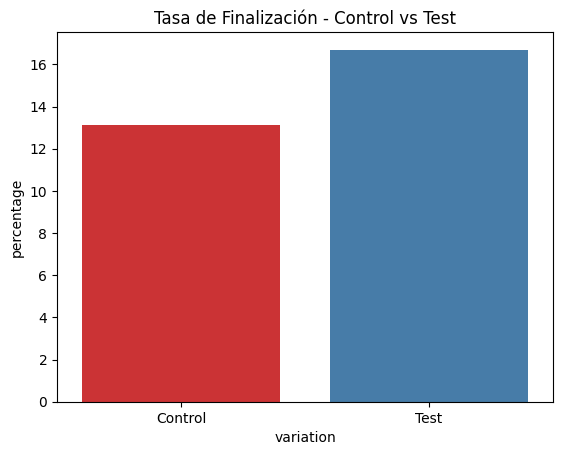

In [22]:
sns.barplot(data=rates_variacion, x="variation", y="percentage", palette="Set1")

plt.title("Tasa de Finalización - Control vs Test")

## HIPOTESIS 2: 

- El nuevo diseño del sitio web (Test) logra una tasa de finalización un 5% mayor que el diseño original (Control).
    
    - H0: La tasa de finalizacion del grupo "test" es igual o menor que la tasa de finalizacion del grupo "control" incrementada en un 5%. (test =< control).
    - H1: La tasa de finalizacion del grupo "test" es mayor la a tasa de finalización del grupo "control" en un 5% (test > control).

- nivel significancia -> 0.05
- alpha = 0.05

In [23]:
prop_control = df_users[df_users["variation"] == "Control"]["completed"].mean()
prop_test    = df_users[df_users["variation"] == "Test"]["completed"].mean()

prop_control, prop_test

(np.float64(0.13121327986570921), np.float64(0.16699203498360143))

In [24]:
prop_inc = prop_control * 1.05

print("Control:", prop_control)
print("Test:", prop_test)
print("Umbral (Control +5%):", prop_inc)
print("¿Test supera el umbral?:", prop_test > prop_inc)

Control: 0.13121327986570921
Test: 0.16699203498360143
Umbral (Control +5%): 0.1377739438589947
¿Test supera el umbral?: True


In [25]:
test_complet = df_users[(df_users["variation"] == "Test") & (df_users["completed"] == True)].shape[0]

grupo_test = df_users[df_users["variation"] == "Test"].shape[0]

In [26]:
_, p_value = proportions_ztest(count=test_complet, nobs=grupo_test, value=prop_inc, alternative='larger')

print("p-value:", p_value)

p-value: 2.3355768189801408e-36


DADO QUE EL RESULTADO DEL P-VALUE, RECHAZAMOS LA HIPOTESIS NULA Y VALIDAMOS LA HIPOTESIS ALTERNATIVA POR LO QUE PODEMOS CONFIRMAR QUE EL NUEVO DISEÑO CUMPLE CON EL COSTO-EFECTIVIDAD DEFINIDO. 
PROCEDEMOS A GRAFICARLO:

In [27]:
prop_grafico = pd.DataFrame({"Category": ["Control", "Test", "Umbral(+5%)"], "Percentage": [prop_control * 100, prop_test * 100, prop_inc * 100]})

C:\Users\HP\AppData\Local\Temp\ipykernel_1580\3314404126.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=prop_grafico, x="Category", y="Percentage", palette=["#4C72B0", "#55A868", "#C44E52"])


Text(0.5, 1.0, 'Validación del Umbral de Costo-Efectividad')

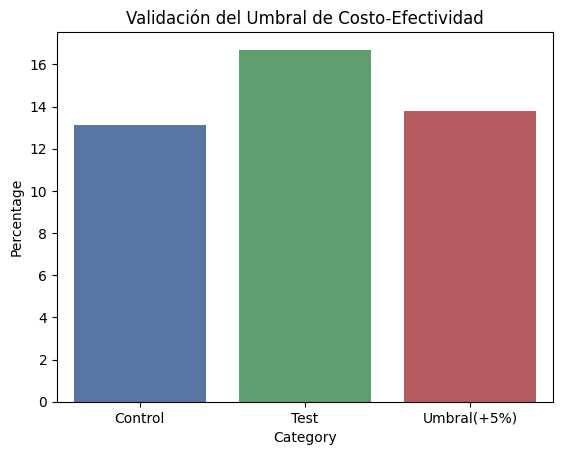

In [28]:
sns.barplot(data=prop_grafico, x="Category", y="Percentage", palette=["#4C72B0", "#55A868", "#C44E52"])

plt.title("Validación del Umbral de Costo-Efectividad")

## HIPOTESIS 3: 

- Dentro del grupo de clientes "test", los "young adults" tienen una tasa de finalización mayor que los "Senior".
    
    - H0: La tasa de finalizacion de young adults es ≤ que la de seniors.
    - H1: La tasa de finalización de young adults es > que la de seniors.

- nivel significancia -> 0.05
- alpha = 0.05

In [29]:
df_master.head()

,client_id,variation,bal,age_category,tenure_category,process_step,paso_sig,step_number,check_error,date_time,next_time,duracion
0,169,NaN,501570.72,Adult,Veteran,start,1.0,0,False,2017-04-12 20:19:36,2017-04-12 20:19:45,9.0
1,169,NaN,501570.72,Adult,Veteran,step_1,2.0,1,False,2017-04-12 20:19:45,2017-04-12 20:20:31,46.0
2,169,NaN,501570.72,Adult,Veteran,step_2,3.0,2,False,2017-04-12 20:20:31,2017-04-12 20:22:05,94.0
3,169,NaN,501570.72,Adult,Veteran,step_3,NaN,3,False,2017-04-12 20:22:05,2017-04-12 20:23:09,64.0
4,555,Test,25454.66,Young Adult,New,start,1.0,0,False,2017-04-15 12:57:56,2017-04-15 12:58:03,7.0


In [30]:
df_test = df_master[["client_id", "variation", "age_category"]].drop_duplicates()

In [31]:
confirmaciones = df_webdata[df_webdata["process_step"] == "confirm"]["client_id"].unique()

In [32]:
df_test["completed"] = df_test["client_id"].isin(confirmaciones)
df_test.head()

,client_id,variation,age_category,completed
0,169,NaN,Adult,False
4,555,Test,Young Adult,False
8,647,Test,Adult,False
12,722,NaN,Adult,False
20,934,Test,Adult,False


In [33]:
df_test = df_test[df_test["variation"] == "Test"]
df_test.head()

,client_id,variation,age_category,completed
4,555,Test,Young Adult,False
8,647,Test,Adult,False
20,934,Test,Adult,False
45,1336,Test,Adult,True
51,1346,Test,Adult,False


In [34]:
df_test.groupby("age_category")["completed"].mean()

age_category
Adult          0.169113
Senior         0.199896
Under 18       0.215385
Young Adult    0.135920
Name: completed, dtype: float64

In [35]:
df_test = df_test[df_test["age_category"].isin(["Young Adult", "Senior"])]
df_test.head()

,client_id,variation,age_category,completed
4,555,Test,Young Adult,False
97,1702,Test,Senior,True
122,1936,Test,Young Adult,False
148,2720,Test,Young Adult,False
171,4369,Test,Senior,False


In [36]:
df_test["age_category"].value_counts()

age_category
Young Adult    7166
Senior         5773
Name: count, dtype: int64

In [37]:
prop_age = df_test.groupby("age_category")["completed"].mean()
prop_age

age_category
Senior         0.199896
Young Adult    0.135920
Name: completed, dtype: float64

In [38]:
young = df_test[df_test["age_category"] == "Young Adult"]["completed"]

senior = df_test[df_test["age_category"] == "Senior"]["completed"]

_, p_value = st.ttest_ind(young, senior, equal_var=False)
print("p-value:", p_value)

p-value: 6.974112539935546e-22


CON EL VALOR DE P-VALUE PODEMOS CONFIRMAR LA H0, Y TENIENDO EN CUENTA LOS CALCULOS REALIZADOS, PODEMOS CONFIMRAR QUE LA CATEGORIA SENIOR TIENE UNA MAYOR TASA DE CONFIRMACION. PROCEDEMOS A GRAFICARLO.

In [39]:
rates_age = (df_test.groupby("age_category")["completed"].mean().reset_index())

rates_age

,age_category,completed
0,Senior,0.199896
1,Young Adult,0.135920


In [40]:
rates_age["percentage"] = rates_age["completed"] * 100

C:\Users\HP\AppData\Local\Temp\ipykernel_1580\605794192.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rates_age, x="age_category", y="percentage", palette="Set2")


Text(0.5, 1.0, 'Tasa de finalización - Grupo Test')

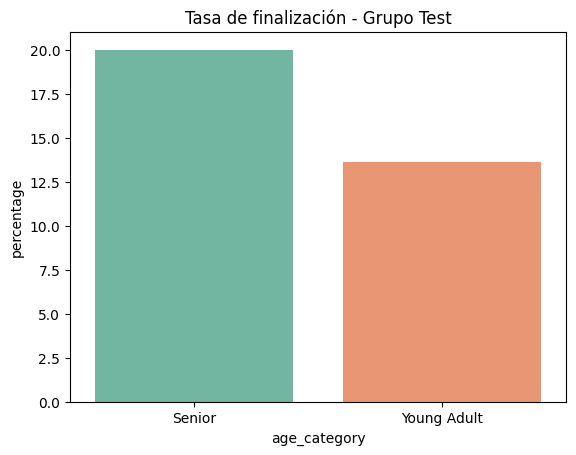

In [41]:
sns.barplot(data=rates_age, x="age_category", y="percentage", palette="Set2")

plt.title("Tasa de finalización - Grupo Test")

H4: Los clientes con mayor antigüedad en Vanguard (categoría "Veteran") presentan una mayor tasa de finalización en el diseño antiguo (Control) que en el nuevo (Test).

* $H_0$ (Hipótesis Nula): $P_{control} \leq P_{test}$

* $H_1$ (Hipótesis Alternativa): $P_{control} > P_{test}$

In [42]:
df_master = pd.read_csv('df_master_clean.csv', index_col=0)

In [43]:
df_vets = df_master[df_master['tenure_category'] == 'Veteran'].copy()

In [44]:
df_h4_control = df_vets[df_vets['variation'] == 'Control']
df_h4_test = df_vets[df_vets['variation'] == 'Test']

In [45]:
confirm_control = df_h4_control[df_h4_control['process_step'] == 'confirm']['client_id'].nunique()
total_veteranos_control = df_h4_control['client_id'].nunique()

print(confirm_control)
print(total_veteranos_control)

571
3002


In [46]:
confirm_test = df_h4_test[df_h4_test['process_step'] == 'confirm']['client_id'].nunique()
total_veteranos_test = df_h4_test['client_id'].nunique()

print(confirm_test)
print(total_veteranos_test)

807
3523


In [47]:
# 1. Filtramos por veteranos y miramos cuántos no tienen variación asignada
#vets_sin_variacion = df_master[(df_master['tenure_category'] == 'Veteran') & (df_master['variation'].isna())]

# 2. Contamos cuántos clientes únicos son
#num_vets_sin_var = vets_sin_variacion['client_id'].nunique()

#print(f"Número de veteranos sin variación asociada: {num_vets_sin_var}")

In [48]:
rate_control = confirm_control / total_veteranos_control *100
rate_test = confirm_test / total_veteranos_test *100

print(f"Tasa de finalización Veteran - Control: {rate_control: .2f}")
print(f"Tasa de finalización Veteran - Test: {rate_test: .2f}")

Tasa de finalización Veteran - Control:  19.02
Tasa de finalización Veteran - Test:  22.91


In [49]:
summary_h4 = pd.DataFrame({
    "group": ["Control", "Test"],
    "completed": [confirm_control, confirm_test],
    "total": [total_veteranos_control, total_veteranos_test]})

summary_h4["completion_rate"] = summary_h4["completed"] / summary_h4["total"]
summary_h4

,group,completed,total,completion_rate
0,Control,571,3002,0.190207
1,Test,807,3523,0.229066


<Axes: xlabel='group', ylabel='completion_rate'>

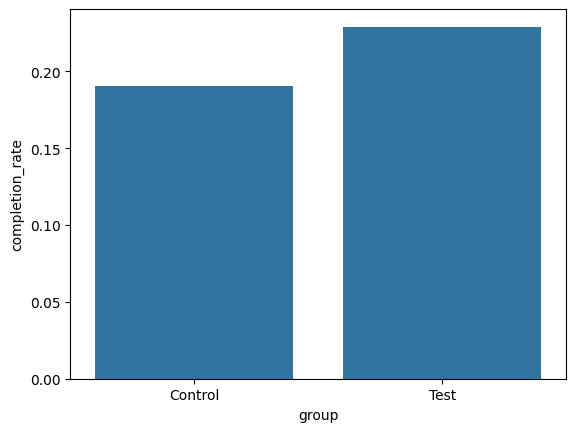

In [50]:
sns.barplot(data=summary_h4, x='group', y='completion_rate')

Realizamos un z-test de proporciones:

In [51]:
count = np.array([confirm_control, confirm_test])
nobs = np.array([total_veteranos_control, total_veteranos_test])

z_stat, p_value = proportions_ztest(count, nobs, alternative="larger")

print(f"Z statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")


Z statistic: -3.8331
P-value: 0.9999


p-value: 0.99 > 0.05. 
No se rechaza la hipótesis nula por lo que juntamente con el estadístico Z de -3.83 y la comparación de tasas de finalización (19.02% vs 22.91%), demuestran que el diseño Test supera al Control. Por lo que, nuestra sospecha inicial de que los veteranos preferirían el diseño antiguo se rechaza, confirmando que el nuevo diseño es más efectivo incluso para los usuarios de más antigüedad.

Se ha utilizado un z-test de proporciones porque la variable analizada es la tasa de finalización, que mide proporciones entre dos grupos independientes (Control y Test). Este test es adecuado para experimentos A/B con muestras grandes y no requiere de comprobaciones de normalidad debido al Teorema del Límite Central.

Un t-test sería más adecuado para variables continuas y asume normalidad en la distribución. Dado que las tasas derivan de datos categóricos, el z-test de proporciones nos ha sido útil para evaluar diferencias en las proporciones observadas entre los grupos.

---

H5: Los clientes con balances altos presentan una tasa de finalización menor en el grupo Test que en el grupo Control.

* $H_0$ (Hipótesis Nula): $P_{test} \geq P_{control}$

* $H_1$ (Hipótesis Alternativa): $P_{test} < P_{control}$

In [52]:
limite_balance = df_master['bal'].quantile(0.75)

print(f"Los clientes VIP son los que tienen más de: {limite_balance: 2f}")

Los clientes VIP son los que tienen más de:  151629.270000


In [53]:
df_h5 = df_master[df_master['bal'] >= limite_balance].copy()

In [54]:
df_h5_control = df_h5[df_h5['variation'] == 'Control']
df_h5_test = df_h5[df_h5['variation'] == 'Test']

In [55]:
confirm_control_h5 = df_h5_control[df_h5_control['process_step'] == 'confirm']['client_id'].nunique()
total_vip_control_h5 = df_h5_control['client_id'].nunique()

print(confirm_control_h5)
print(total_vip_control_h5)

905
5012


In [56]:
confirm_test_h5 = df_h5_test[df_h5_test['process_step'] == 'confirm']['client_id'].nunique()
total_vip_test_h5 = df_h5_test['client_id'].nunique()

print(confirm_test_h5)
print(total_vip_test_h5)

1284
5900


In [57]:
rate_control_h5 = confirm_control_h5 / total_vip_control_h5 *100
rate_test_h5 = confirm_test_h5 / total_vip_test_h5 *100

print(f"Tasa de finalización VIP - Control: {rate_control_h5: .2f}")
print(f"Tasa de finalización VIP - Test: {rate_test_h5: .2f}")

Tasa de finalización VIP - Control:  18.06
Tasa de finalización VIP - Test:  21.76


In [58]:
summary_h5 = pd.DataFrame({
    "group": ["Test", "Control"],
    "completed": [confirm_test_h5, confirm_control_h5],
    "total": [total_vip_test_h5, total_vip_control_h5]})

summary_h5["completion_rate"] = summary_h5["completed"] / summary_h5["total"]
summary_h5

,group,completed,total,completion_rate
0,Test,1284,5900,0.217627
1,Control,905,5012,0.180567


<Axes: xlabel='group', ylabel='completion_rate'>

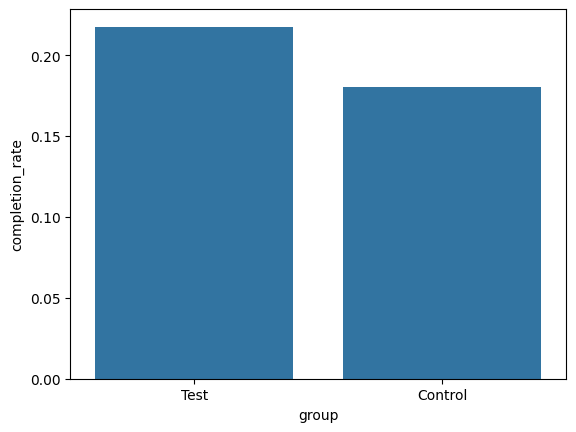

In [59]:
sns.barplot(data=summary_h5, x='group', y='completion_rate')

In [60]:
count_h5 = np.array([confirm_test_h5, confirm_control_h5])
nobs_h5 = np.array([total_vip_test_h5, total_vip_control_h5])

z_stat_h5, p_value_h5 = proportions_ztest(count_h5, nobs_h5, alternative="smaller")

print(f"Z statistic: {z_stat_h5:.4f}")
print(f"P-value: {p_value_h5:.4f}")

Z statistic: 4.8177
P-value: 1.0000


p-value 1.00 > 0.05. No se rechaza la hipótesis nula, lo que, sumado al estadístico Z de 4.81 y la comparación de tasas (Control: 18.06% vs Test: 21.76%), demuestra que el diseño Test también supera al Control en el segmento VIP. Nuestra sospecha de que los clientes con balances altos preferirían el diseño antiguo se rechaza, confirmando que el nuevo sistema es más efectivo incluso para usuarios con mayores activos.

In [61]:
confirmados = df_master[df_master['process_step'] == 'confirm']['client_id'].unique()
df_master['confirmado'] = df_master['client_id'].isin(confirmados)
df_master.to_csv('df_tableau_final.csv', index=False)

In [62]:
df_master

,client_id,variation,bal,age_category,tenure_category,process_step,paso_sig,step_number,check_error,date_time,next_time,duracion,confirmado
0,169,NaN,501570.72,Adult,Veteran,start,1.0,0,False,2017-04-12 20:19:36,2017-04-12 20:19:45,9.0,False
1,169,NaN,501570.72,Adult,Veteran,step_1,2.0,1,False,2017-04-12 20:19:45,2017-04-12 20:20:31,46.0,False
2,169,NaN,501570.72,Adult,Veteran,step_2,3.0,2,False,2017-04-12 20:20:31,2017-04-12 20:22:05,94.0,False
3,169,NaN,501570.72,Adult,Veteran,step_3,NaN,3,False,2017-04-12 20:22:05,2017-04-12 20:23:09,64.0,False
4,555,Test,25454.66,Young Adult,New,start,1.0,0,False,2017-04-15 12:57:56,2017-04-15 12:58:03,7.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
379217,9999839,NaN,67425.35,Young Adult,Long Term,start,0.0,0,False,2017-03-29 12:08:55,2017-03-29 12:11:32,157.0,False
379218,9999839,NaN,67425.35,Young Adult,Long Term,start,1.0,0,False,2017-03-29 12:11:32,2017-03-29 12:11:35,3.0,False
379219,9999839,NaN,67425.35,Young Adult,Long Term,step_1,2.0,1,False,2017-03-29 12:11:35,2017-03-29 12:11:50,15.0,False
379220,9999839,NaN,67425.35,Young Adult,Long Term,step_2,3.0,2,False,2017-03-29 12:11:50,2017-03-29 12:12:28,38.0,False
